# Analysis the Overcurrent of Rotator

This notebook is to analyze the overcurrent issue of rotator in [OBS-308](https://jira.lsstcorp.org/browse/OBS-308) and [OBS-424](https://jira.lsstcorp.org/browse/OBS-424).

## Import Modules

In [2]:
%matplotlib inline
%matplotlib widget
from datetime import datetime
import time
from astropy.time import Time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lsst.ts.aos.utils import DiagnosticsDefault, EfdName

## Declaration of User-defined Functions

## Instantiate the Diagnostics

In [3]:
diagnostics = DiagnosticsDefault(efd_name=EfdName.Usdf)

In [14]:
time_starts = [
    Time("2024-02-07T04:54:00", scale="utc", format="isot"),
    Time("2024-02-07T08:45:30", scale="utc", format="isot"),
    Time("2024-02-14T01:13:00", scale="utc", format="isot"),
    Time("2024-02-14T01:29:00", scale="utc", format="isot"),
    Time("2024-02-14T04:53:30", scale="utc", format="isot"),
    Time("2024-02-14T05:02:00", scale="utc", format="isot"),
    Time("2024-02-14T07:07:40", scale="utc", format="isot"),
    Time("2024-02-14T07:24:00", scale="utc", format="isot"),
    Time("2024-02-14T07:44:40", scale="utc", format="isot"),
    Time("2024-02-15T01:52:50", scale="utc", format="isot"),
    Time("2024-02-15T02:03:40", scale="utc", format="isot"),
    Time("2024-02-15T03:14:15", scale="utc", format="isot"),
    Time("2024-02-15T03:18:10", scale="utc", format="isot"),
    Time("2024-02-15T04:11:30", scale="utc", format="isot"),
    Time("2024-02-15T04:18:00", scale="utc", format="isot"),
    Time("2024-02-15T04:53:20", scale="utc", format="isot"),
    Time("2024-02-16T00:26:30", scale="utc", format="isot"),
    Time("2024-02-16T00:42:00", scale="utc", format="isot"),
    Time("2024-02-16T00:51:40", scale="utc", format="isot"),
    Time("2024-02-16T01:53:00", scale="utc", format="isot"),
    Time("2024-02-16T03:21:40", scale="utc", format="isot"),
    Time("2024-02-16T04:03:30", scale="utc", format="isot"),
    Time("2024-02-16T04:07:10", scale="utc", format="isot"),
]
times_ends = [
    Time("2024-02-07T04:55:00", scale="utc", format="isot"),
    Time("2024-02-07T08:46:30", scale="utc", format="isot"),
    Time("2024-02-14T01:14:00", scale="utc", format="isot"),
    Time("2024-02-14T01:29:30", scale="utc", format="isot"),
    Time("2024-02-14T04:54:30", scale="utc", format="isot"),
    Time("2024-02-14T05:02:30", scale="utc", format="isot"),
    Time("2024-02-14T07:08:30", scale="utc", format="isot"),
    Time("2024-02-14T07:24:40", scale="utc", format="isot"),
    Time("2024-02-14T07:45:00", scale="utc", format="isot"),
    Time("2024-02-15T01:53:40", scale="utc", format="isot"),
    Time("2024-02-15T02:04:20", scale="utc", format="isot"),
    Time("2024-02-15T03:14:30", scale="utc", format="isot"),
    Time("2024-02-15T03:19:10", scale="utc", format="isot"),
    Time("2024-02-15T04:12:10", scale="utc", format="isot"),
    Time("2024-02-15T04:18:30", scale="utc", format="isot"),
    Time("2024-02-15T04:53:40", scale="utc", format="isot"),
    Time("2024-02-16T00:26:50", scale="utc", format="isot"),
    Time("2024-02-16T00:42:50", scale="utc", format="isot"),
    Time("2024-02-16T00:51:50", scale="utc", format="isot"),
    Time("2024-02-16T01:53:10", scale="utc", format="isot"),
    Time("2024-02-16T03:22:00", scale="utc", format="isot"),
    Time("2024-02-16T04:04:00", scale="utc", format="isot"),
    Time("2024-02-16T04:07:20", scale="utc", format="isot"),
]

In [58]:
data_position_07 = data.actualPosition[data.demandVelocity != 0.0]

In [69]:
data_position_14 = data.actualPosition[data.demandVelocity != 0.0]

In [74]:
data_position_15 = data.actualPosition[data.demandVelocity != 0.0]

In [77]:
data_position_16 = data.actualPosition[data.demandVelocity != 0.0]

In [76]:
time_start = Time("2024-02-16T00:00:00", scale="utc", format="isot")
time_end = Time("2024-02-16T05:00:00", scale="utc", format="isot")
data = await diagnostics.efd_client.select_time_series(
    "lsst.sal.MTRotator.rotation", 
    fields=["actualPosition", "demandVelocity", "timestamp"], 
    start=time_start,
    end=time_end,
)

In [29]:
values = [75.5, 86.5, 19.6, 69.0, 66.5, 70.1, 41.6, 15.3, 37.9, -48.6, -16.6,
    -72.8, 59.7, -42.2, -39.3, -54.6, 78.3, -23.0, 81.3, 28.6, 65.4, 67.9,
    73.1]

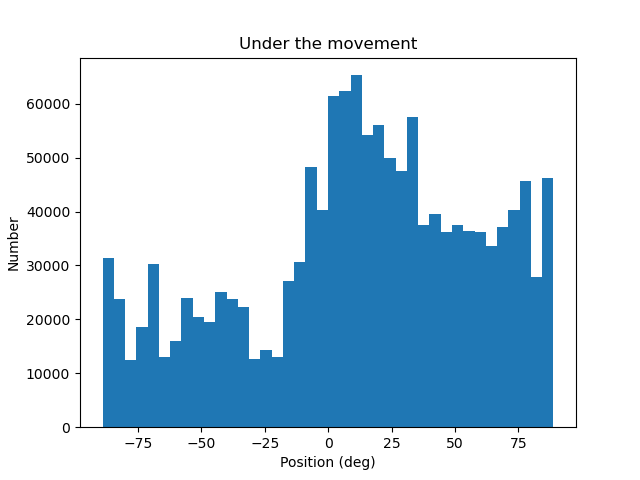

In [82]:
all_position = [
    data_position_07,
    data_position_14,
    data_position_15,
    data_position_16,
]
all_data = np.array([])
for position_data in all_position:
    all_data = np.append(all_data, np.array(position_data))

plt.figure()
plt.hist(all_data, bins=40)
plt.xlabel("Position (deg)")
plt.ylabel("Number")
plt.title("Under the movement")
plt.show()